# Speech tagging

`Markov chain` is a mathematical model used to describe a sequence of events where the probability of each event depends only on the state attained in the previous event — not on any earlier history.

`Transition Probabilities` - the probabilities of moving from one state to another.
These are written in a transition matrix P.

|   | Noun | Verb | Other |
|---|------|------|------|
| **$\pi$** | 0.4 | 0.4 | 0.3 |
| **Noun** | 0.2 | 0.4 | 0.4 |
| **Verb** | 0.5 | 0.3 | 0.2 |
| **Other** | 0.3 | 0.4 | 0.3 |

`Transition matrix`:
$$
P = \begin{bmatrix}
{0.4} & {0.4} & {0.3} \\
{0.2} & {0.4} & {0.4} \\
{0.5} & {0.3} & {0.2} \\
{0.3} & {0.4} & {0.3}
\end{bmatrix}
$$

### Hidden Markov chain

In hidden markov models apart from `transition matrix`, there is a  `emission probabilities matrix` that gives the probability to go from one state (POS tag) to a specific word. Once we know the tag (from transition matrix) we try to find most probable word (from emission matrix).

|   | going | to | eat |
|---|------|------|------|
| **Noun** | 0.2 | 0.4 | 0.4 |
| **Verb** | 0.3 | 0.1 | 0.5 |
| **Other** | 0.3 | 0.5 | 0.68 |

`Emission matrix`:
$$
E = \begin{bmatrix}
{0.2} & {0.4} & {0.4} \\
{0.3} & {0.1} & {0.5} \\
{0.3} & {0.5} & {0.68} 
\end{bmatrix}
$$

$$
E = \begin{bmatrix}
e_{w1t1} & e_{w2t1} & e_{w3t1} \\
e_{w1t2} & e_{w2t2} & e_{w3t2} \\
e_{w1t3} & e_{w2t3} & e_{w3t3} 
\end{bmatrix}
$$
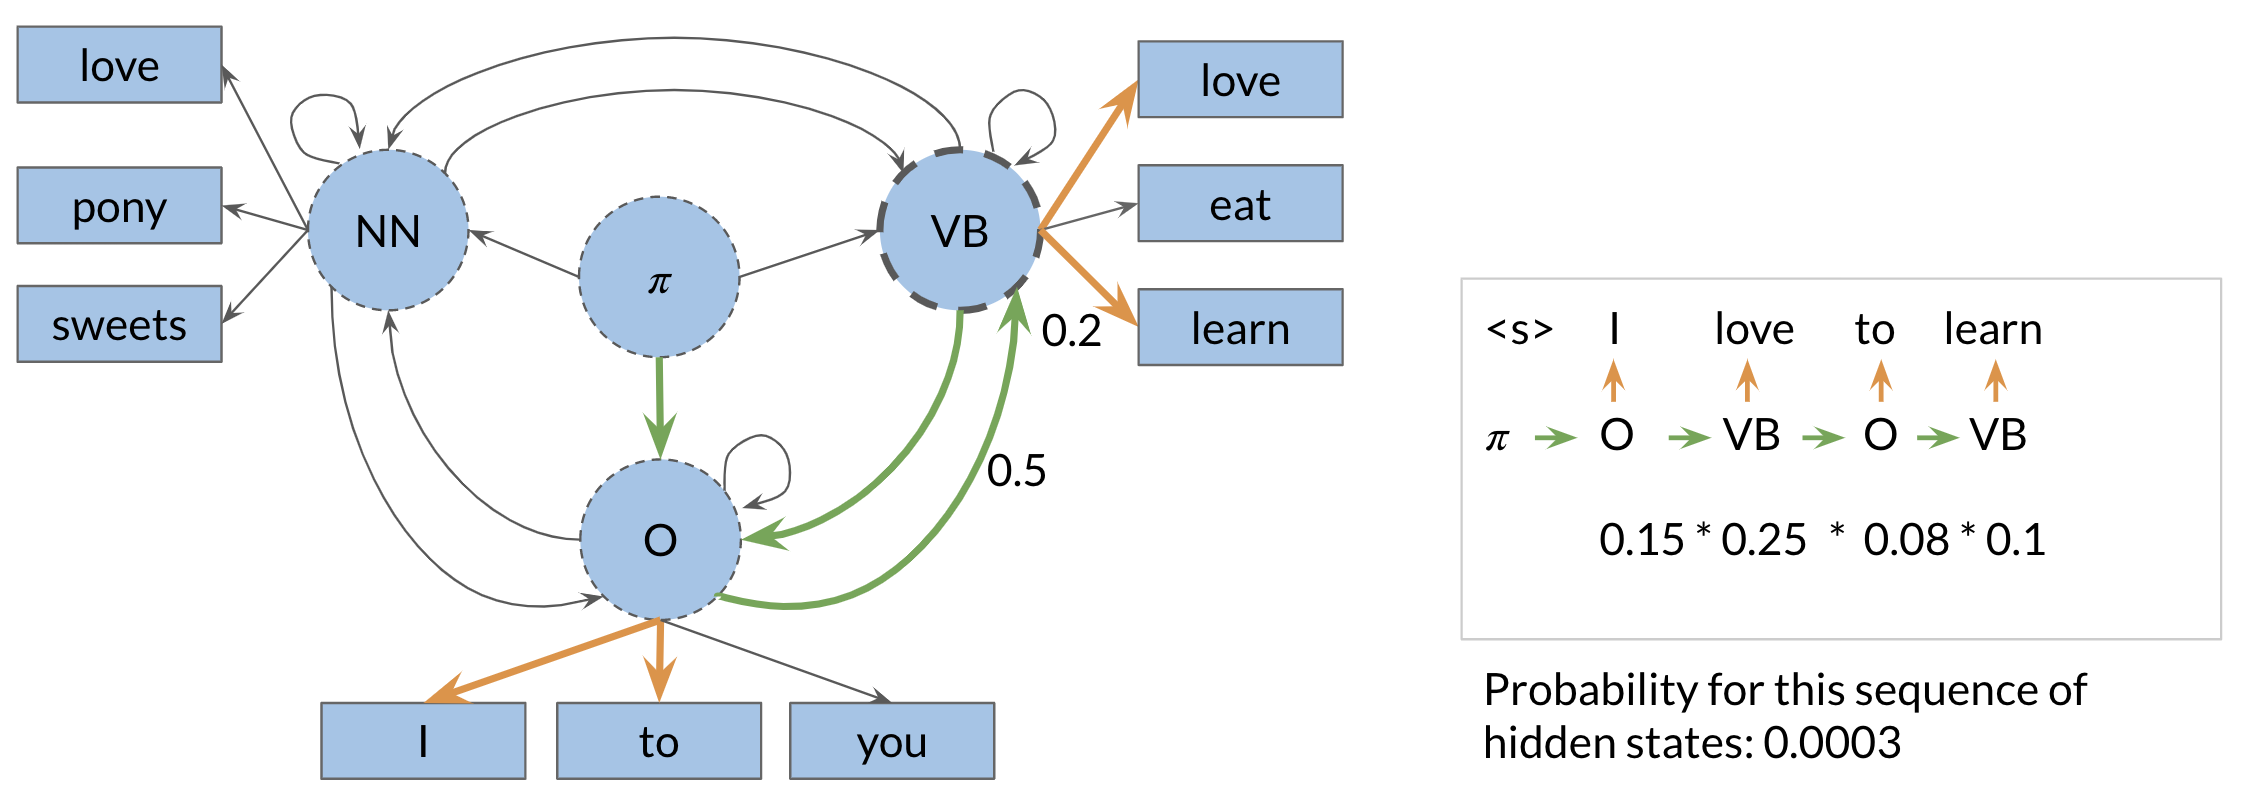

### Viterbi Algorithm
`Viterbi Algorithm` allows to assign a tag to each word in a given sentence.
$$ S = w_1 + w_2 + w_4 + ... $$
It consits of two matcices C and D.

Matrix C describes the product of maximum emissions probability for each word for each tag.
$$ c_{i,j} = \max_k \; c_{k,j-1} \cdot t_{k,i} \cdot e_{i,\text{cindex}(w_j)} $$


|         | w_1                      | w_2                       | w_3 |
|:-------:|:------------------------:|:--------------------------:|:----------:|
| **t_1** | $ C_{w_1t_1} $ | $ C_{w2t1} = \max_i (C_{w1ti} \cdot t_i \cdot e_{w_2t_1}) $ | $ \max_i (C_{w2ti} \cdot t_i \cdot e_{w_3t_1}) $ |
| **t_2** | $ C_{w_1t_2} $ | $ C_{w2t2} = \max_i (C_{w1ti} \cdot t_i \cdot e_{w_2t_2}) $ | $ \max_i (C_{w2ti} \cdot t_i \cdot e_{w_3t_1}) $ |
| **t_3** | $ C_{w_1t_3} $ | $ C_{w2t3} = \max_i (C_{w1ti} \cdot t_i \cdot e_{w_2t_3}) $ | $ \max_i (C_{w2ti} \cdot t_i \cdot e_{w_3t_1}) $ |
|   \ |  \x \{x_x_x} \ | \x \{x_x_x} \x \{x_x_x} \x \{x_x_x} \x \{x_x_x} \ | \x \{x_x_x} \x \{x_x_x} \x \{x_x_x} \x \{x_x_x} \ |


Matrix D describes the i for the max condition in C

$$ d_{i,j} = \arg (\max_k \; c_{k,j-1} \cdot t_{k,i} \cdot e_{i,\text{cindex}(w_j)}) $$


|         | w_1                      | w_2                       | w_3 |
|:-------:|:------------------------:|:--------------------------:|:----------:|
| **t_1** | $ D_{w_1t_1} $ | $ D_{w2t1} = \arg \max_i (C_{w1ti} \cdot t_i \cdot e_{w_2t_1}) $ | $ D_{w3t1} = \arg \max_i (C_{w2ti} \cdot t_i \cdot e_{w_3t_1}) $ |
| **t_2** | $ D_{w_1t_2} $ | $ D_{w2t2} = \arg \max_i (C_{w1ti} \cdot t_i \cdot e_{w_2t_2}) $ | $ D_{w3t2} = \arg \max_i (C_{w2ti} \cdot t_i \cdot e_{w_3t_1}) $ |
| **t_3** | $ D_{w_1t_3} $ | $ D_{w2t3} = \arg \max_i (C_{w1ti} \cdot t_i \cdot e_{w_2t_3}) $ | $ D_{w3t3} = \arg \max_i (C_{w2ti} \cdot t_i \cdot e_{w_3t_1}) $ |
|   \ |  \x \{x_x_x} \ | \x \{x_x_x} \x \{x_x_x} \x \{x_x_x} \x \{x_x_x} \ | \x \{x_x_x} \x \{x_x_x} \x \{x_x_x} \x \{x_x_x} \ |



### Backward Pass
Once the matrices are filled, we use backward pass to assignt each word with `most probable tah for this sentence`.
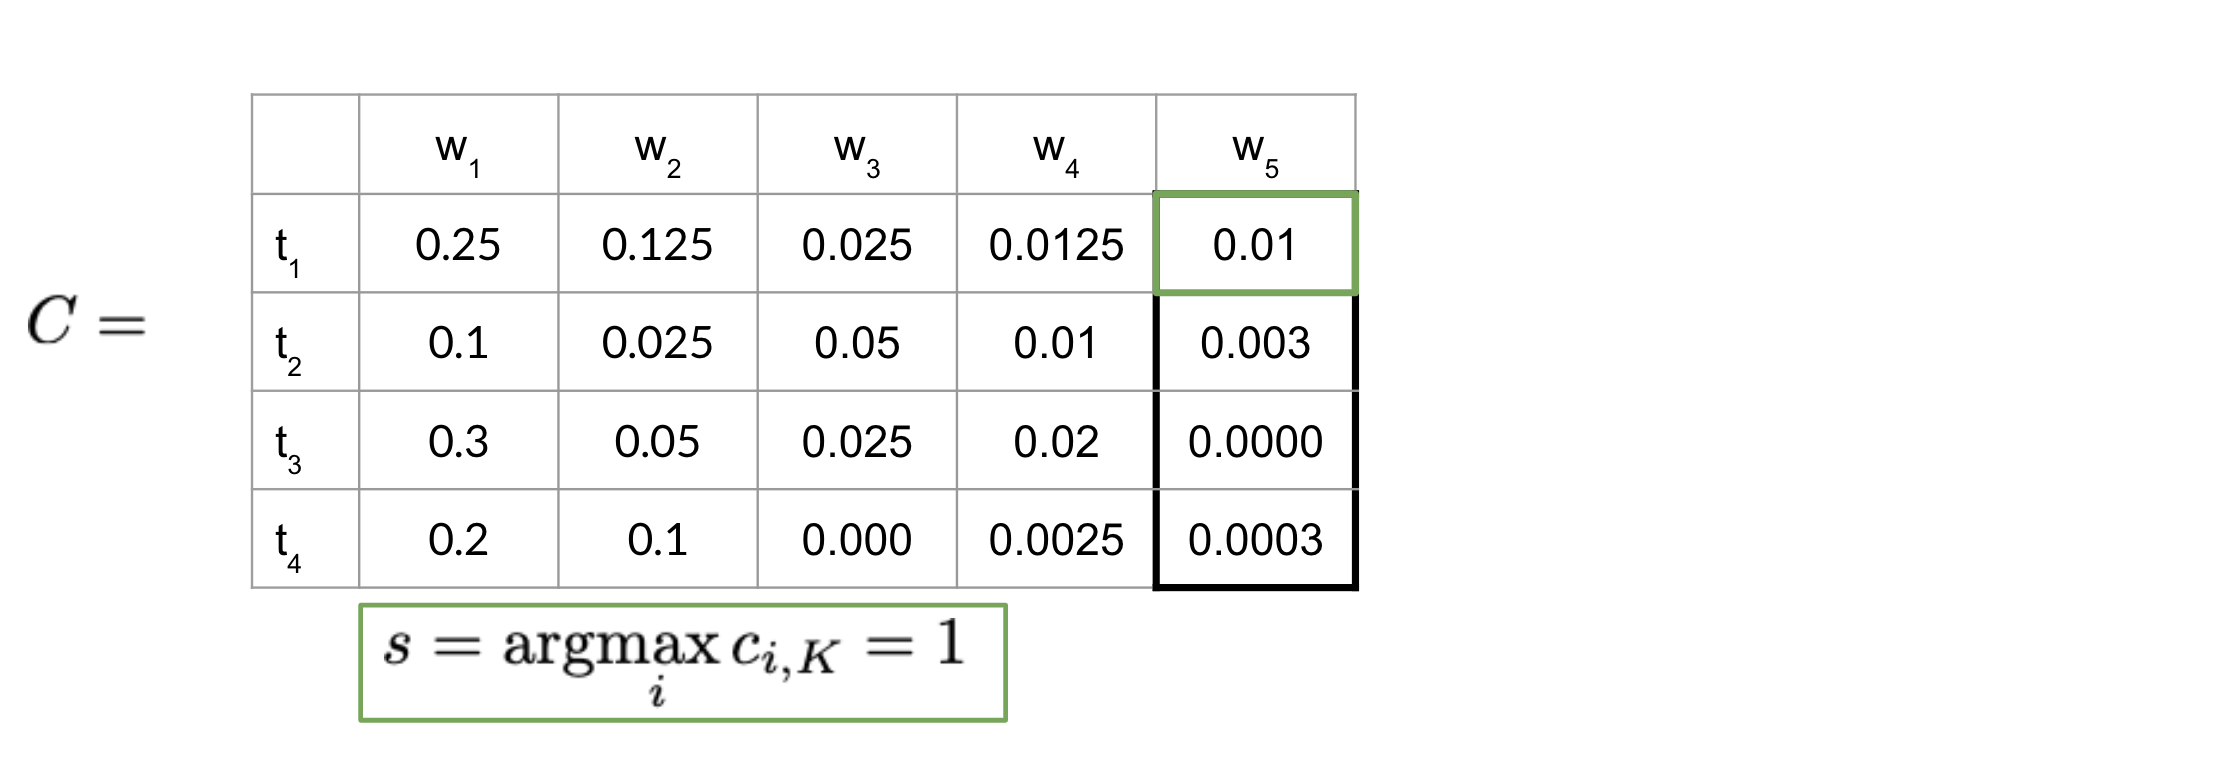
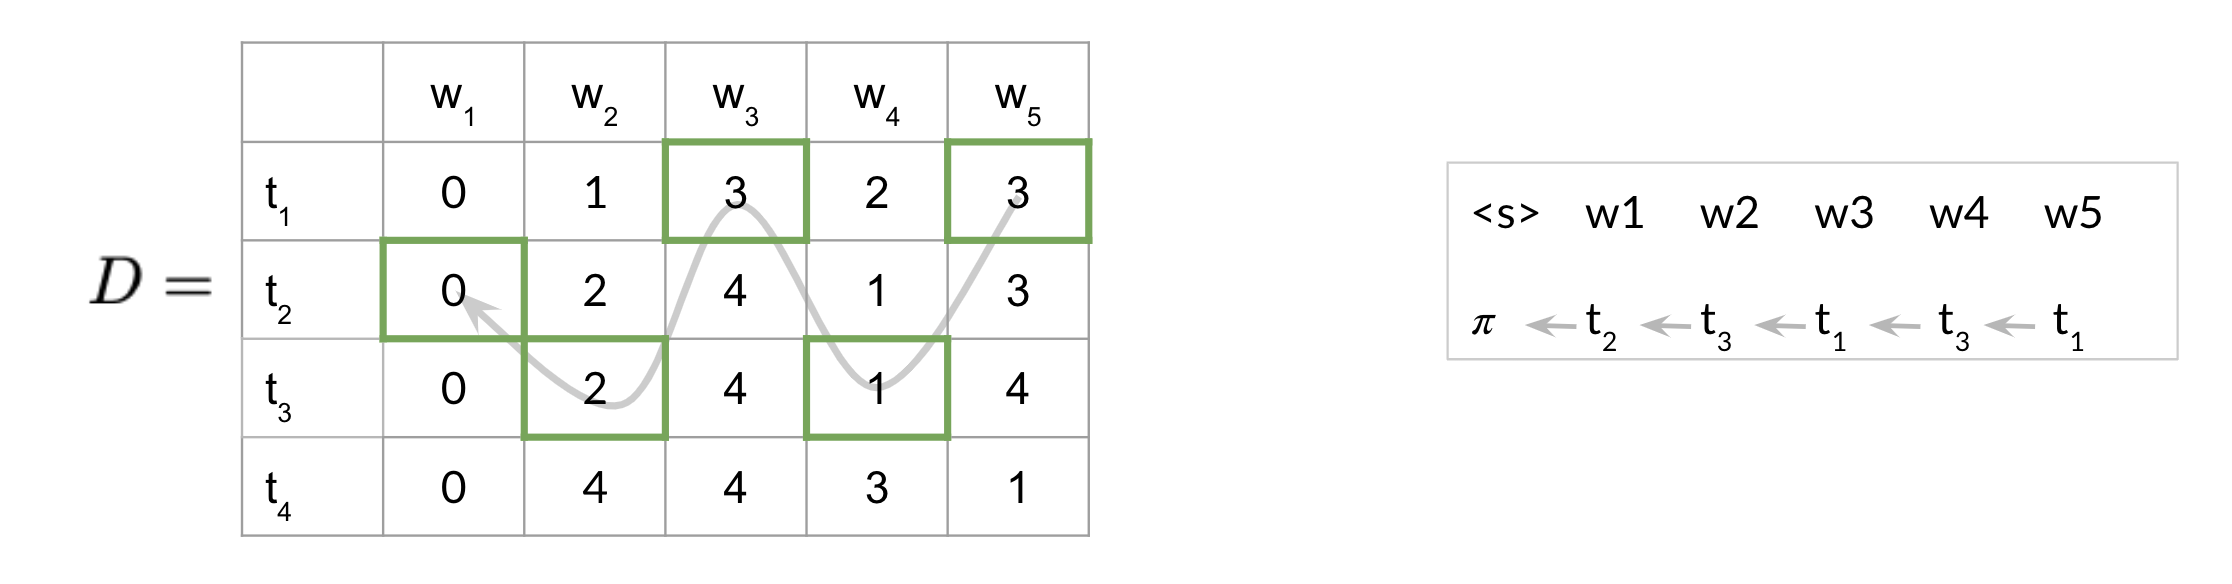